# Ford GoBike Data Exploration (2017)
## by Chaitanya Bachhav



## Introduction
> Ford GoBike is a bike share system functioning in United States, this data set consists information about bike rides made using Ford GoBike in the year 2017. Each row contains information like start station, end station, trip start time, trip end time, and type of user. The objective is to perform explanatory analysis on this data-set and provide necessary visuals.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [2]:
# load data-set into a pandas dataframe
bike_data = pd.read_csv('2017-fordgobike-tripdata.csv')
    

In [3]:
# display summary of data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [4]:
# descriptive statistical summary of data
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [5]:
bike_data.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
437785,739,2017-08-15 17:03:01.3140,2017-08-15 17:15:20.8490,96,Dolores St at 15th St,37.766210,-122.426614,99,Folsom St at 15th St,37.767037,-122.415443,2403,Subscriber
72801,528,2017-12-05 10:02:04.4520,2017-12-05 10:10:53.1170,130,22nd St Caltrain Station,37.757369,-122.392057,101,San Bruno Ave at 16th St,37.766008,-122.405677,1973,Subscriber
247209,1039,2017-10-13 09:37:19.5830,2017-10-13 09:54:38.6270,55,Webster St at Grove St,37.777053,-122.429558,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,639,Customer
495844,590,2017-07-19 15:28:16.2010,2017-07-19 15:38:06.6790,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,24,Spear St at Folsom St,37.789677,-122.390428,122,Subscriber
292071,2134,2017-09-30 15:23:15.6170,2017-09-30 15:58:49.9400,148,Horton St at 40th St,37.829705,-122.287610,246,Berkeley Civic Center,37.869060,-122.270556,1411,Customer
156401,396,2017-11-08 08:23:05.7860,2017-11-08 08:29:41.9890,195,Bay Pl at Vernon St,37.812314,-122.260779,182,19th Street BART Station,37.809013,-122.268247,2674,Subscriber
509397,343,2017-07-10 16:50:26.6320,2017-07-10 16:56:10.2140,23,The Embarcadero at Steuart St,37.791464,-122.391034,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,355,Subscriber
699,1230,2017-12-31 14:32:22.8570,2017-12-31 14:52:53.6980,41,Golden Gate Ave at Polk St,37.781270,-122.418740,323,Broadway at Kearny,37.798014,-122.405950,2546,Customer
311462,233,2017-09-25 13:26:52.4910,2017-09-25 13:30:46.3460,37,2nd St at Folsom St,37.785000,-122.395936,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,1006,Subscriber
31247,1108,2017-12-16 14:54:58.6680,2017-12-16 15:13:26.8070,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,321,5th at Folsom,37.780146,-122.403071,2594,Customer


### Cleaning

In [6]:
# change data type of start_time and end_time to datetime datatype
bike_data.start_time = pd.to_datetime(bike_data.start_time)
bike_data.end_time = pd.to_datetime(bike_data.end_time)
# change the user type to categorical data
bike_data.user_type = bike_data.user_type.astype('category')


### What is the structure of your dataset?

> The data set consists bike share data for 519700 bike rides, each bike ride (row) has 13 features (columns), they are:
- duration_sec               
- start_time                 
- end_time                   
- start_station_id           
- start_station_name         
- start_station_latitude    
- start_station_longitude   
- end_station_id            
- end_station_name          
- end_station_latitude      
- end_station_longitude     
- bike_id                   
- user_type                 

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in finding which features affect duration of trip. We'll also be investigate the influence of variables on number of trips  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features like start_time, end_time, user_type.

## Univariate Exploration

> The following cells will depict the process of univariate exploration. The first couple of cells show the distribution of duration.

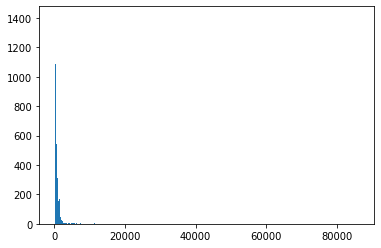

In [7]:
# standard-scaled distribution of duration
bins = np.arange(bike_data.duration_sec.min(), bike_data.duration_sec.max() + 1.25, 1.25)
plt.hist(bike_data.duration_sec, bins = bins);

> The above plot is right-skewed, the next step would be to change the scale.

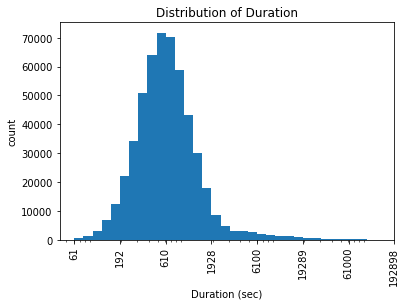

In [8]:
# distribution of duration -- log scaled
bins = 10 ** np.arange(np.log10(bike_data.duration_sec.min()),np.log10(bike_data.duration_sec.max()) + 0.1, 0.1)
ticks = 10 ** np.arange(np.log10(bike_data.duration_sec.min()),np.log10(bike_data.duration_sec.max()) + 0.5, 0.5)
labels = list()
for tick in ticks:
    labels.append('{:d}'.format(int(tick)))
plt.hist(bike_data.duration_sec, bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels, rotation = 90)
plt.xlabel('Duration (sec)')
plt.ylabel('count')
plt.title('Distribution of Duration');

> After changing the scale the plot appears to be unimodal. 

> Now we'll explore the distribution of following categorical variables:
- month wise distribution of start_time
- month wise distribution of end_time
- week day wise distribution of start and end times

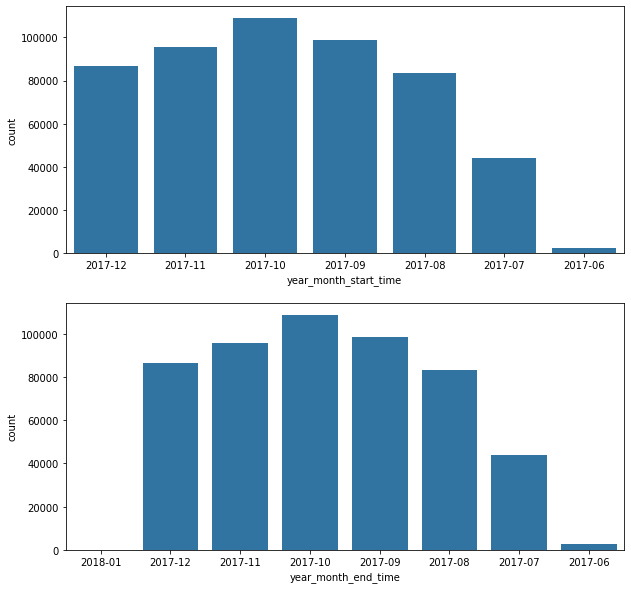

In [9]:
bike_data['year_month_start_time'] = bike_data.start_time.dt.to_period('M')
bike_data['year_month_end_time'] = bike_data.end_time.dt.to_period('M')
base_color = sb.color_palette()[0]
fig , ax = plt.subplots(nrows = 2, figsize = [10,10])
sb.countplot(bike_data.year_month_start_time, color = base_color, ax = ax[0])
sb.countplot(bike_data.year_month_end_time, color = base_color, ax = ax[1])

plt.show();

It appears the most of the trips have ocurred between July 2017 and December 2017. There is very less trip data from June 2017.
 The start and end trip data are comparable, i.e. number of trips started  = number of trips ended. Few trips have started on  31 Dec 2017 and ended on 1 Jan 2018, which explains the presence of 2018-01 in the plot. Maximum number of trips have occured in October 2017


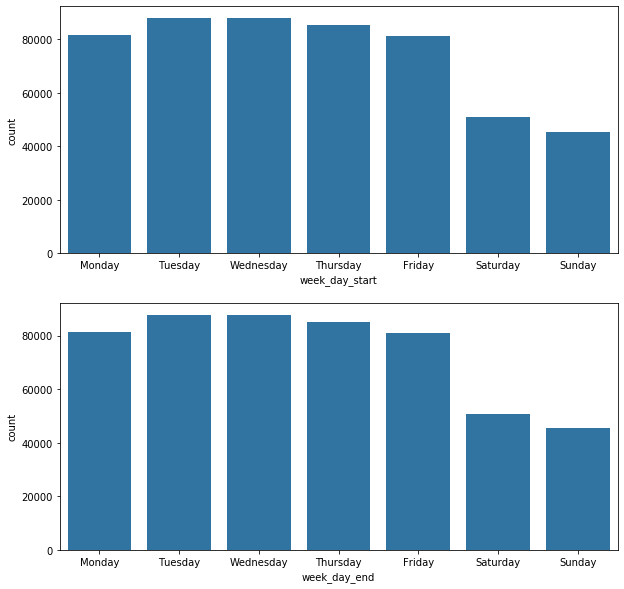

In [10]:
bike_data['week_day_start'] = bike_data.start_time.dt.day_name()
bike_data['week_day_end'] = bike_data.end_time.dt.day_name()
base_color = sb.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig , ax = plt.subplots(nrows = 2, figsize = [10,10])
sb.countplot(bike_data.week_day_start, color = base_color, ax = ax[0], order = order)
sb.countplot(bike_data.week_day_end, color = base_color, ax = ax[1], order = order)

plt.show() ;

The start and end trip plots are similar which is logically accurate. The plots show that the most bike rides occur on week days, this suggests that users use bike to go to work.

 > Now we'll explore the user-type feature. 

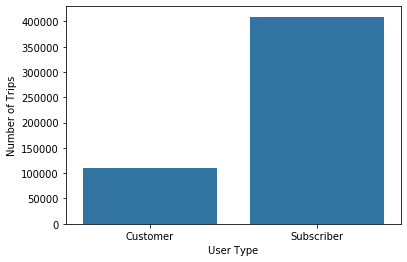

In [11]:
sb.countplot(bike_data.user_type, color = sb.color_palette()[0]);
plt.xlabel("User Type")
plt.ylabel("Number of Trips");

It can be observed that subscribers ride more often than casual customers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> On a linear scale the distribution of duration time was right skewed and had a long tail, this warranted the use of a logarithmin scale. On the logarithmic scale the distribution appears to be uni-modal. The peak was observed at around 600 seconds. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Another variable of interest is the number of trips variable, in order to successfully explore the most frequent start and end time the respective variables were changed to date-time types. The user_type feature was changed to a categorical data type. Month - wise distributions of number trips were depicted for both starting and ending of trips. 

## Bivariate Exploration

> Following relationships will be investigated in this section.
- User Type vs Mean Trip Duration
- Start Month vs Mean Trip Duration
- Week day vs Mean Trip Duration
- Month vs Day Distributioin of trips

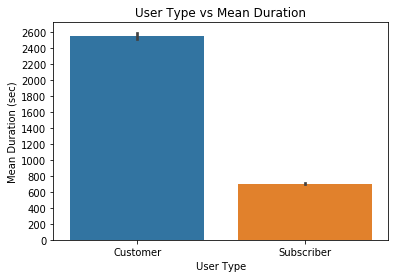

In [12]:
# plot user type vs trip duration
sb.barplot(data = bike_data, x = 'user_type', y = 'duration_sec')
plt.xlabel("User Type")
plt.ylabel('Mean Duration (sec)')
plt.title('User Type vs Mean Duration')
plt.yticks(np.arange(0,2800, 200));

It can be observed that the mean duration of casual customers is around 2550, and that of subscribers is around 700, this suggests that casual customers ride longer than subscribers. This is interesting because the number of trips made by subscribers is more than number of trips made by customers. 

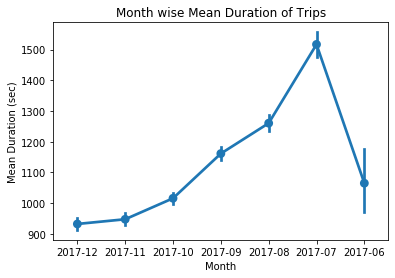

In [13]:
# mean duration in each month
sb.pointplot(x = bike_data.year_month_start_time, y = bike_data.duration_sec)
plt.ylabel("Mean Duration (sec)")
plt.xlabel("Month")
plt.title('Month wise Mean Duration of Trips');


It can be observed that users went on longer bike rides in July 2017, the mean duration declined from July to December. A box plot will be more useful to depict the number trips along with previous data. The mean is higher than expected, a box plot would provide a better visualization.

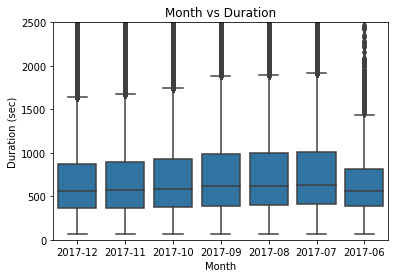

In [15]:
sb.boxplot(bike_data.year_month_start_time, bike_data.duration_sec, color = sb.color_palette()[0])
plt.ylim((0, 2500))
plt.ylabel("Duration (sec)")
plt.xlabel("Month")
plt.title('Month vs Duration');


In [16]:
bike_data.query('duration_sec > 1800').shape

(35892, 17)

As expected the high mean was due to the presence of large number of outliers, but July 2017 still has most ride time.

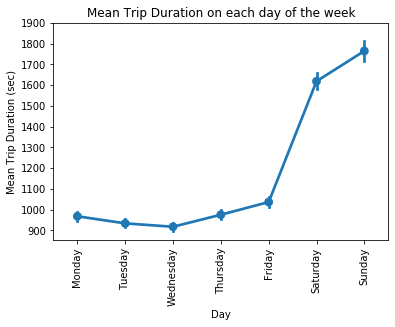

In [18]:
# mean trip duration on each week day
sb.pointplot(x = bike_data.week_day_start, y = bike_data.duration_sec, order = order)
plt.yticks(np.arange(900, 2000, 100))
plt.xticks(rotation = 90)
plt.xlabel('Day')
plt.ylabel('Mean Trip Duration (sec)')
plt.title('Mean Trip Duration on each day of the week');

It can be inferred that users go on longer bike rides on week ends, the number of trips on week ends is less but the mean trip duration is highest on Sundays. The mean values are higher than expected, a box plot will provide a better depiction.

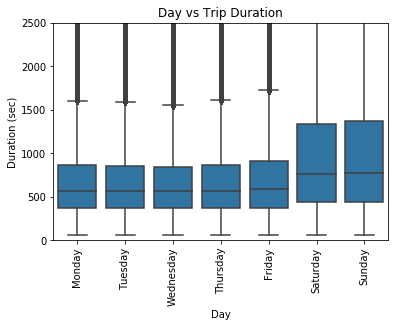

In [20]:
sb.boxplot(bike_data.week_day_start,bike_data.duration_sec, color = sb.color_palette()[0], order = order)
plt.ylim((0,2500))
plt.ylabel('Duration (sec)')
plt.xlabel('Day')
plt.xticks(rotation = 90)
plt.title('Day vs Trip Duration');

As expected the mean value is small, but the mean follows a similar trend depicting that bike rides on week ends are longer. 

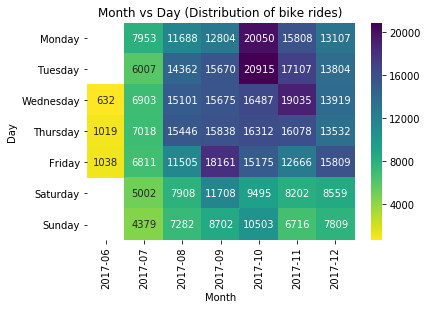

In [21]:
# month vs week day
counts_ct = pd.DataFrame(bike_data.groupby(['year_month_start_time', 'week_day_start']).size())
counts_ct = counts_ct.rename(columns = {0 : 'count'} )
counts_ct = counts_ct.reset_index()
counts_ct = counts_ct.pivot(index = 'week_day_start', columns = 'year_month_start_time', values = 'count').reindex(order)
g = sb.heatmap(counts_ct, cmap = 'viridis_r', annot = True, fmt = '0.0f');
b, t = plt.ylim() 
b += 0.5 
t -= 0.5  
plt.ylim(b, t) 
plt.xlabel('Month')
plt.ylabel('Day')
plt.title('Month vs Day (Distribution of bike rides)');

plt.show() 


It can be observed that in every month most of the bike rides occur during working days (week days) and the number of bike rides is lesser during weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was observed that casual cutomers go on longer bike rides than regular subscribers. The month vs mean trip duration plot depicted that the mean trip duration was highest in July 2017 and declined after that. Longest trips occurred on week ends especially Sunday.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> After plotting Month vs Day distribution of bike rides it was confirmed that the pattern of more bike rides during working days is consistent month-wise.

## Multivariate Exploration

> This part focusses on exploring the effect of day, month and user on the duration of trips.

In [1]:
plt.figure(figsize = (10,8))
sb.boxplot(x = bike_data.week_day_start, y = bike_data.duration_sec, hue = bike_data.user_type, order = order, flier = 1/20);
plt.ylim((0,4500))
plt.legend(title = 'User Type', bbox_to_anchor = (1,1));

NameError: name 'plt' is not defined

It is evident that the mean duration of rides is greater for casual customers, also users go on longer rides on week-ends.

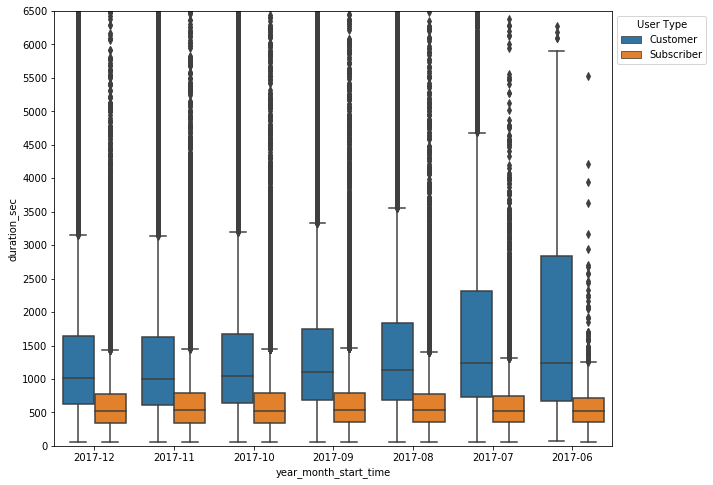

In [28]:
plt.figure(figsize = (10,8))
sb.boxplot(x = bike_data.year_month_start_time, y = bike_data.duration_sec, hue = bike_data.user_type);
plt.ylim((0,6000))
plt.legend(bbox_to_anchor = (1,1), title = 'User Type')
plt.yticks(np.arange(0,7000, 500));

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part the effects of month, day and user type on the duration of trips, were inspected. It can be observed that casual customers go on longer bike trips than subscribers. It was also observed that the longest trips were made during week ends and summer days (month july). 

### Were there any interesting or surprising interactions between features?

> Even though subsribers ride more often than casual customers the mean duration for bike rides of casual customers is more than the duration of bike rides made by subscribers. Other than this the plot depicts similar results as observed in the bivariate exploration. 